In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
data="https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
table=pd.read_csv(data)
table.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <BarContainer object of 10 artists>)

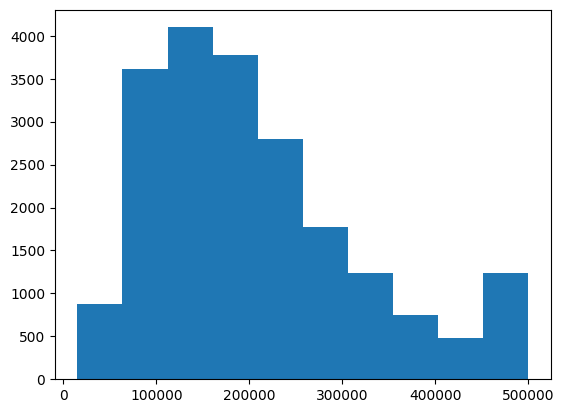

In [125]:
np.histogram(table['median_house_value'])
plt.hist(table['median_house_value'])
#yes long tail

In [126]:
table
table1=table[table['ocean_proximity']=='INLAND']
table2=table[table['ocean_proximity']=='<1H OCEAN']
tablenew = pd.concat([table1,table2])
tablenew = tablenew[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]
tablenew

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
954,37.64,-121.92,46.0,1280.0,209.0,512.0,208.0,5.1406,315600.0
957,37.66,-121.90,18.0,7397.0,1137.0,3126.0,1115.0,6.4994,323000.0
965,37.68,-121.88,23.0,2234.0,270.0,854.0,286.0,7.3330,337200.0
967,37.67,-121.88,16.0,4070.0,624.0,1543.0,577.0,6.5214,311500.0
968,37.67,-121.88,25.0,2244.0,301.0,937.0,324.0,6.4524,296900.0
...,...,...,...,...,...,...,...,...,...
20502,34.33,-118.68,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0
20503,34.33,-118.75,27.0,534.0,85.0,243.0,77.0,8.2787,330000.0
20504,34.29,-118.73,11.0,5451.0,736.0,2526.0,752.0,7.3550,343900.0
20505,34.29,-118.72,22.0,3266.0,529.0,1595.0,494.0,6.0368,248000.0


In [127]:
tablenew['total_bedrooms'].isnull().values.any()
#total bedrooms has missing value


True

In [128]:
tablenew['population'].median()
#1195 is median

1195.0

In [129]:
# seperate into train/test/validation
np.random.seed(42)
n_val = int(0.2 * len(tablenew))
n_test = int(0.2 * len(tablenew))
n_train = len(tablenew) - (n_val + n_test)
order = np.arange(len(tablenew))
np.random.shuffle(order)
table_shuffle = tablenew.iloc[order]
train = table_shuffle.iloc[:n_train].copy()
val = table_shuffle.iloc[n_train:n_train+n_val].copy()
test = table_shuffle.iloc[n_train+n_val:].copy()
train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
18691,36.96,-121.77,20.0,4228.0,816.0,2389.0,844.0,3.5250,229100.0
13545,34.13,-117.31,38.0,1287.0,284.0,1047.0,269.0,2.2865,65500.0
6199,34.08,-117.88,30.0,6132.0,1538.0,3147.0,1449.0,2.7763,187800.0
16216,37.95,-121.32,36.0,747.0,189.0,338.0,145.0,1.7885,62100.0
11358,33.74,-117.92,13.0,4620.0,1265.0,3385.0,1109.0,3.1773,186500.0
...,...,...,...,...,...,...,...,...,...
19261,38.44,-122.74,23.0,2819.0,612.0,1644.0,546.0,2.6576,147900.0
19109,38.23,-122.63,45.0,2264.0,504.0,1076.0,472.0,3.0139,194100.0
16464,38.11,-121.27,15.0,2039.0,384.0,1178.0,375.0,3.8672,120100.0
6444,34.11,-118.03,38.0,2076.0,361.0,988.0,332.0,5.9175,416900.0


In [130]:
y_train_orig = train.median_house_value.values
y_val_orig = val.median_house_value.values
y_test_orig = test.median_house_value.values
y_train = np.log1p(train.median_house_value.values)
y_val = np.log1p(val.median_house_value.values)
y_test = np.log1p(test.median_house_value.values)

In [131]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]
def prepare_X(df):
    df_num = df[tablenew.columns]
    df_num = df_num.fillna(0)
    # df_num = df_num.fillna(np.mean(tablenew))
    X = df_num.values
    return X

In [132]:
np.mean(tablenew)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


latitude                  35.467307
longitude               -119.217442
housing_median_age        27.188118
total_rooms             2665.677312
total_bedrooms           541.244688
population              1466.317205
households               500.916491
median_income              3.804019
median_house_value    191943.020017
dtype: float64

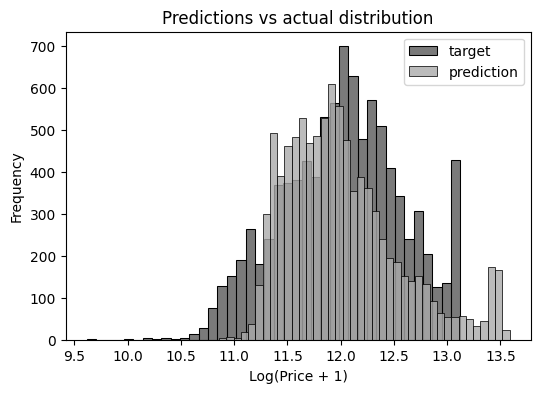

In [133]:
X_train = prepare_X(train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [134]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

rmse(y_train, y_pred)
X_val = prepare_X(val)
y_pred = w_0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

#RMSE same for 0 vs mean NA fill

0.17

In [135]:
#regularization
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]
X_train = prepare_X(train)
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f' % (r, w_0))
X_train = prepare_X(train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(val)
y_pred = w_0 + X_val.dot(w)
print('val', round(rmse(y_val, y_pred),2))


    0, 3.80
0.001, 3.79
 0.01, 3.71
  0.1, 3.08
    1, 1.14
   10, 0.16
train 0.16944072359731924
val 0.17


In [136]:
len(y_pred)

3137

In [137]:
X_train = prepare_X(train)
X_val = prepare_X(val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred),2))
# all are the same, so r=0 is the best

 1e-06 0.17
0.0001 0.17
 0.001 0.17
  0.01 0.17
   0.1 0.17
     1 0.17
     5 0.17
    10 0.17


In [138]:
seeds = np.arange(10)
seeds


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [139]:
errors=[]
for i in seeds:
  np.random.seed(i)
  n_val = int(0.2 * len(tablenew))
  n_test = int(0.2 * len(tablenew))
  n_train = len(tablenew) - (n_val + n_test)
  order = np.arange(len(tablenew))
  np.random.shuffle(order)
  table_shuffle = tablenew.iloc[order]
  train = table_shuffle.iloc[:n_train].copy()
  val = table_shuffle.iloc[n_train:n_train+n_val].copy()
  test = table_shuffle.iloc[n_train+n_val:].copy()
  y_train_orig = train.median_house_value.values
  y_val_orig = val.median_house_value.values
  y_test_orig = test.median_house_value.values
  y_train = np.log1p(train.median_house_value.values)
  y_val = np.log1p(val.median_house_value.values)
  y_test = np.log1p(test.median_house_value.values)
  def train_linear_regression(X, y):
      ones = np.ones(X.shape[0])
      X = np.column_stack([ones, X])

      XTX = X.T.dot(X)
      XTX_inv = np.linalg.inv(XTX)
      w = XTX_inv.dot(X.T).dot(y)

      return w[0], w[1:]
  def prepare_X(df):
      df_num = df[tablenew.columns]
      df_num = df_num.fillna(0)
      # df_num = df_num.fillna(np.mean(tablenew))
      X = df_num.values
      return X
  X_train = prepare_X(train)
  w_0, w = train_linear_regression(X_train, y_train)
  y_pred = w_0 + X_train.dot(w)
  def rmse(y, y_pred):
      error = y_pred - y
      mse = (error ** 2).mean()
      return np.sqrt(mse)
  rmse(y_train, y_pred)
  X_val = prepare_X(val)
  y_pred = w_0 + X_val.dot(w)
  errors.append(rmse(y_val, y_pred))
  print(round(rmse(y_val, y_pred),3))
round(np.std(errors),3)
#closest to 0.005

0.168
0.173
0.165
0.173
0.169
0.167
0.174
0.172
0.171
0.166


0.003

In [140]:
np.random.seed(9)
n_val = int(0.2 * len(tablenew))
n_test = int(0.2 * len(tablenew))
n_train = len(tablenew) - (n_val + n_test)
order = np.arange(len(tablenew))
np.random.shuffle(order)
table_shuffle = tablenew.iloc[order]
train = table_shuffle.iloc[:n_train].copy()
val = table_shuffle.iloc[n_train:n_train+n_val].copy()
test = table_shuffle.iloc[n_train+n_val:].copy()
y_train_orig = train.median_house_value.values
y_val_orig = val.median_house_value.values
y_test_orig = test.median_house_value.values
y_train = np.log1p(train.median_house_value.values)
y_val = np.log1p(val.median_house_value.values)
y_test = np.log1p(test.median_house_value.values)


In [141]:
train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10164,33.89,-117.96,24.0,1332.0,252.0,625.0,230.0,4.4375,334100.0
19026,38.35,-122.00,34.0,432.0,65.0,208.0,71.0,5.5435,136000.0
14954,32.75,-116.98,25.0,4137.0,662.0,1905.0,630.0,4.3750,214000.0
11410,33.71,-117.93,10.0,2775.0,717.0,1581.0,633.0,4.1366,158800.0
19948,36.21,-119.36,25.0,1170.0,259.0,804.0,257.0,1.3889,50200.0
...,...,...,...,...,...,...,...,...,...
16421,37.87,-121.29,29.0,488.0,108.0,308.0,115.0,2.6563,103100.0
19380,37.77,-120.85,52.0,436.0,81.0,197.0,68.0,1.8625,85400.0
10213,33.88,-117.90,34.0,1396.0,245.0,661.0,261.0,4.6750,215400.0
9884,36.69,-121.80,12.0,3877.0,914.0,2274.0,858.0,3.4239,194800.0


In [142]:
train = pd.concat([train,val])
y_train = np.append(y_train,y_val)
val = test
y_val = y_test

In [144]:
X_train = prepare_X(train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
y_pred = w_0 + X_val.dot(w)
X_val = prepare_X(val)
y_pred = w_0 + X_val.dot(w)
print('test', round(rmse(y_val, y_pred),2))
#closest to 0.13

test 0.17
